## Employee Attrition Prediction using Naive Bayes
#### Problem Statement:
##### We have historical Data with a number of features about each employee. The ask from the organization is to predict whether or not an Employee, given it's attributes values, will attrite or not.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import Employee Data into a DataFrame

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
##no missing values in the data

In [7]:
##Replacing 'YEs' and 'NO' in target feature by 1 and 0
df.Attrition.replace({'Yes':1, 'No':0}, inplace=True)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
df.groupby(['Department'])['Attrition'].count().reset_index()

,Department,Attrition
0,Human Resources,63
1,Research & Development,961
2,Sales,446


In [14]:
df['rate_bin'] = 'NB'
def drate(rate):
    if rate >= 0 and rate < 200:
        return '0-200rate'
    elif rate >= 200 and  rate <500:
        return '200-500rate'
    elif rate >= 500 and rate <800:
        return '500-800rate'
    elif rate >=800:
        return '800+rate'
df['rate_bin'] = df['DailyRate'].apply(drate)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,rate_bin
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,800+rate
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,200-500rate
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,800+rate
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,800+rate
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,500-800rate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,1,17,3,3,5,2,0,3,800+rate
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,1,9,5,3,7,7,1,7,500-800rate
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,1,6,0,3,6,2,0,3,0-200rate
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,0,17,3,2,9,6,0,8,800+rate


<Axes: xlabel='rate_bin', ylabel='count'>

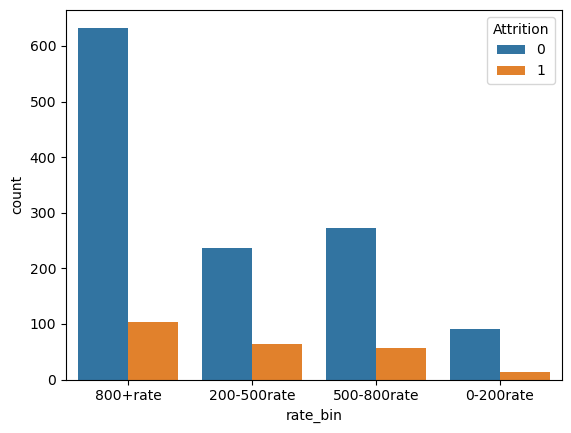

In [16]:
sns.countplot(x='rate_bin', data=df, hue='Attrition')

In [61]:
df_att = pd.DataFrame(df[df['Attrition'] == 1]['rate_bin'].value_counts().sort_index(ascending=False))
df_att.reset_index(inplace=True)

<Axes: xlabel='rate_bin', ylabel='count'>

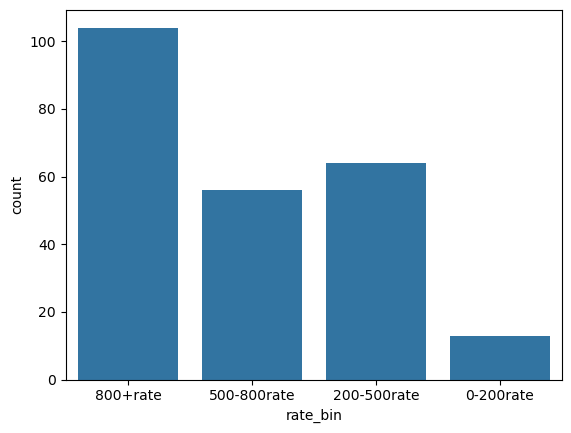

In [62]:
sns.barplot(data=df_att, x='rate_bin', y='count')

#### Deleting the following columns as their values are the same across all observations

In [10]:
df = df.drop(columns=['EmployeeCount','StandardHours'], axis=1)


In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### create lists of categorical features and numerical features

In [63]:
cat_col = df.select_dtypes(exclude=np.number).columns
num_col = df.select_dtypes(include=np.number).columns

In [64]:
for i in cat_col:
    print(f'\n===================> {i} \n')
    print(df[i].value_counts())


===================> BusinessTravel 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

===================> Department 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

===================> EducationField 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

===================> Gender 

Gender
Male      882
Female    588
Name: count, dtype: int64

===================> JobRole 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64



In [65]:
##this will show whether there are varieties of categories in each of the categorical variables

In [69]:
##observe that for the feature 'over18', we have the same values throughout the entire column, hence
#we drop it
df = df.drop('Over18', axis=1)

KeyError: "['Over18'] not found in axis"

In [70]:
cat_col = df.select_dtypes(exclude=np.number).columns

In [71]:
for col in cat_col:
    print(f'\n=============> {col} \n')
    print(df[col].value_counts())


=============> BusinessTravel 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

=============> Department 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

=============> EducationField 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

=============> Gender 

Gender
Male      882
Female    588
Name: count, dtype: int64

=============> JobRole 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

=============> MaritalStatus 


### creating dummy variables from the nominal data

In [72]:
cat_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'rate_bin'],
      dtype='object')

In [83]:
cat_col=cat_col.drop('rate_bin')

KeyError: "['rate_bin'] not found in axis"

In [84]:
cat_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [88]:
encoded_cat_col = pd.get_dummies(df[cat_col], drop_first=True, dtype=int)

In [89]:
final_model = pd.concat([df[num_col], encoded_cat_col], axis=1)

In [90]:
final_model

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,0,613,6,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,0,155,4,3,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,0,1023,2,3,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


In [93]:
final_model.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Direc

In [94]:
final_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [96]:
##importing model creation libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

#### segregate X and y features, create train and test sets

In [97]:
x = final_model.drop(columns='Attrition')
y = final_model['Attrition']
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=10)

In [99]:
from sklearn.naive_bayes import GaussianNB

### Creating our Gaussian Naive Bayes model

In [100]:
model = GaussianNB()

### Train and predict using training data

In [101]:
model.fit(X_train, y_train)
train_pred = model.predict(X_train)

In [102]:
metrics.confusion_matrix(y_train, train_pred)

array([[749, 127],
       [ 58,  95]], dtype=int64)

In [103]:
accuracy_percent_train = (metrics.accuracy_score(y_train, train_pred))*100
accuracy_percent_train

82.02137998056365

##### The model is able to predict with 825 accuracy from training data

### Predict using test data

In [104]:
test_pred = model.predict(X_test)

In [106]:
metrics.confusion_matrix(test_pred,y_test)

array([[300,  28],
       [ 57,  56]], dtype=int64)

In [108]:
accuracy_test_pred = metrics.accuracy_score(test_pred,y_test)
accuracy_test_pred

0.8072562358276644

##### the model is able to predict with 80.7%

In [110]:
##printing a dataframe of the predictions vs actuals
data = pd.DataFrame(list(zip(y_test, test_pred)), columns=['y_test','test_pred'])
data.head(20)

,y_test,test_pred
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,1,0
8,0,0
9,0,0


In [113]:
###investtigating the threshold probabilities
nb_prob = model.predict_proba(X_train)

In [114]:
nb_prob = nb_prob[:, 1]
nb_prob

array([0.538011  , 0.00515574, 0.10321745, ..., 0.25586363, 0.0286284 ,
       0.03633445])

In [118]:
df_nb = pd.DataFrame({'nb_prob':nb_prob})

In [127]:
data_train = pd.DataFrame(list(zip(y_train,train_pred, nb_prob)), columns=['y_train','train_pred','nb_prob'])

In [128]:
data_train

,y_train,train_pred,nb_prob
0,0,1,5.380110e-01
1,0,0,5.155742e-03
2,0,0,1.032174e-01
3,0,0,6.332133e-07
4,0,1,9.894312e-01
...,...,...,...
1024,0,0,2.939553e-01
1025,0,0,6.856754e-02
1026,0,0,2.558636e-01
1027,0,0,2.862840e-02


In [129]:
###using the precision recall curve
from sklearn.metrics import precision_recall_curve

In [130]:
data_train['predicted'] = data_train.nb_prob.map(lambda x : 1 if x >0.3 else 0)

In [131]:
data_train

,y_train,train_pred,nb_prob,predicted
0,0,1,5.380110e-01,1
1,0,0,5.155742e-03,0
2,0,0,1.032174e-01,0
3,0,0,6.332133e-07,0
4,0,1,9.894312e-01,1
...,...,...,...,...
1024,0,0,2.939553e-01,0
1025,0,0,6.856754e-02,0
1026,0,0,2.558636e-01,0
1027,0,0,2.862840e-02,0


In [132]:
metrics.accuracy_score(data_train.y_train, data_train.predicted)

0.738581146744412

In [133]:
metrics.confusion_matrix(data_train.y_train, data_train.predicted)

array([[649, 227],
       [ 42, 111]], dtype=int64)

In [134]:
##we notice that at 0.3 probability threshold, our model performs less

In [135]:
##manually check to see what percentage will be right for threshold
numbers = [x/float(10) for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [136]:
for i in numbers:
    data_train[i] = data_train.nb_prob.map(lambda x : 1 if x > i else 0)

In [138]:
data_train.head(10)

,y_train,train_pred,nb_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1,5.380110e-01,1,1,1,1,1,1,1,0,0,0,0
1,0,0,5.155742e-03,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1.032174e-01,0,1,1,0,0,0,0,0,0,0,0
3,0,0,6.332133e-07,0,1,0,0,0,0,0,0,0,0,0
4,0,1,9.894312e-01,1,1,1,1,1,1,1,1,1,1,1
5,0,0,6.857824e-02,0,1,0,0,0,0,0,0,0,0,0
6,0,0,1.857624e-01,0,1,1,0,0,0,0,0,0,0,0
7,1,0,4.800996e-01,1,1,1,1,1,1,0,0,0,0,0
8,0,0,2.094860e-01,0,1,1,1,0,0,0,0,0,0,0
9,0,0,4.935901e-03,0,1,0,0,0,0,0,0,0,0,0


In [140]:
data_train.train_pred.values == data_train[0.5].values

array([ True,  True,  True, ...,  True,  True,  True])

In [142]:
list(zip(data_train.train_pred, data_train[0.5]))

[(1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 

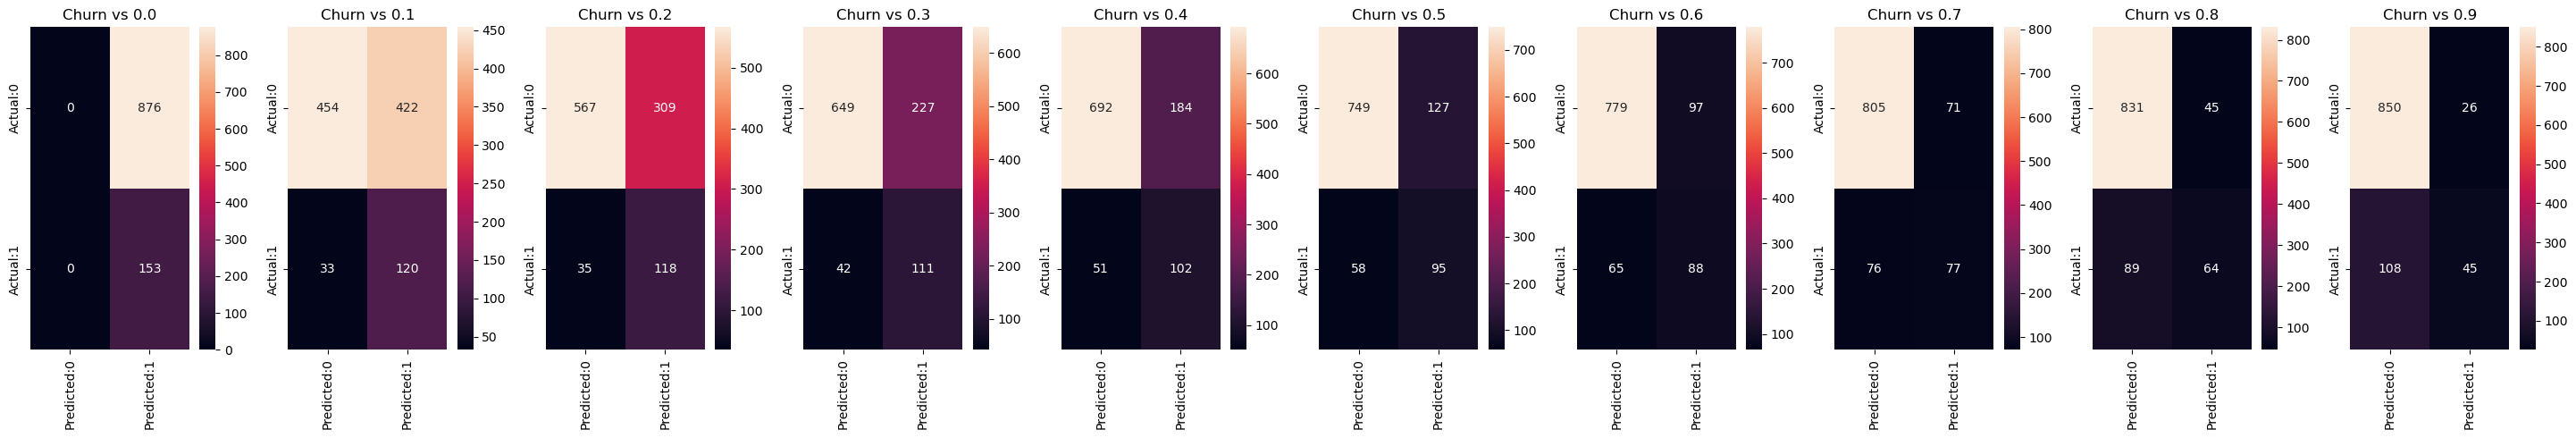

In [144]:
plt.figure(figsize=(29, 5))
for idx,i in enumerate(numbers, start=1):
    plt.subplot(1, len(numbers), idx)
    cm4 = metrics.confusion_matrix(data_train.y_train, data_train[i])
    conf_matrix = pd.DataFrame(data=cm4, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title(f'Churn vs {i}')
plt.tight_layout()
plt.show()

In [148]:
for idx, i in enumerate(numbers, start=1):
    print(f'\n =======accuracy at {i}===========>\n')
    accuracy = (metrics.accuracy_score(data_train.y_train, data_train[i])*100)
    print(accuracy)


 =======accuracy at 0.0===========>

14.868804664723031

 =======accuracy at 0.1===========>

55.78231292517006

 =======accuracy at 0.2===========>

66.56948493683188

 =======accuracy at 0.3===========>

73.8581146744412

 =======accuracy at 0.4===========>

77.16229348882409

 =======accuracy at 0.5===========>

82.02137998056365

 =======accuracy at 0.6===========>

84.25655976676384

 =======accuracy at 0.7===========>

85.71428571428571

 =======accuracy at 0.8===========>

86.977648202138

 =======accuracy at 0.9===========>

86.977648202138


In [149]:
data_at_09 = pd.DataFrame(list(zip(data_train.y_train, data_train[0.9])))

In [151]:
data_at_09.head(20)

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


In [152]:
##we cannot rely solely on accuracy as a measure
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

<Axes: xlabel='Attrition', ylabel='count'>

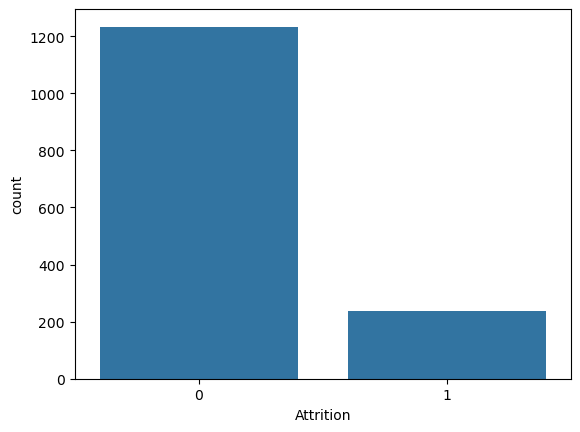

In [157]:
sns.barplot(df.Attrition.value_counts())

In [192]:
##Notice a high imbalance of class observations where class 0 > class 1

In [161]:
df[df['Attrition']==1].groupby(['Attrition']).size()

Attrition
1    237
dtype: int64

In [162]:
df[df['Attrition']==0].groupby(['Attrition']).size()

Attrition
0    1233
dtype: int64

In [163]:
##high imbalance of class observations hence we rely on precision_recall tradeoff

In [164]:
p,r, threshold = precision_recall_curve(data_train.y_train, data_train.nb_prob)

In [166]:
prob_df = pd.DataFrame(list(zip(r,p, threshold)), columns=['recall','precision','thr_probs'])
prob_df

,recall,precision,thr_probs
0,1.000000,0.148688,1.841147e-08
1,1.000000,0.148833,3.994426e-08
2,1.000000,0.148978,4.820989e-08
3,1.000000,0.149123,6.625389e-08
4,1.000000,0.149268,9.350908e-08
...,...,...,...
1024,0.032680,1.000000,9.973323e-01
1025,0.026144,1.000000,9.985070e-01
1026,0.019608,1.000000,9.991666e-01
1027,0.013072,1.000000,9.995132e-01


Text(0, 0.5, 'precision')

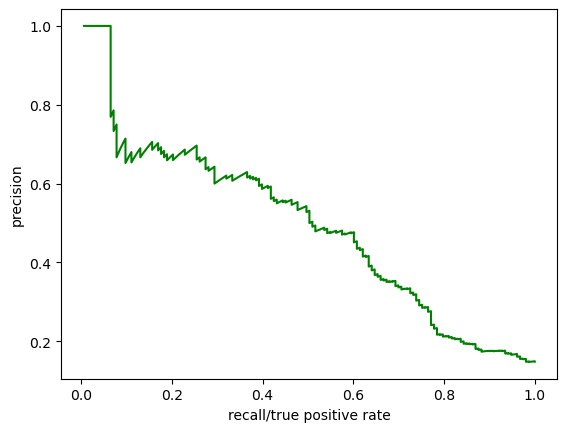

In [170]:
plt.plot(prob_df.recall, prob_df.precision, 'g-')
plt.xlabel('recall/true positive rate')
plt.ylabel('precision')

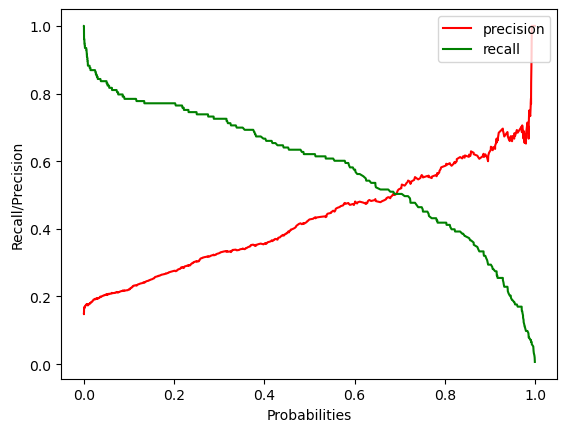

In [183]:
##the tradeoff mark will be visible at the intersection of the recall and precision lines
plt.plot(prob_df.thr_probs,prob_df.precision, color='red', label='precision')
plt.plot(prob_df.thr_probs,prob_df.recall, color='green',label='recall')
plt.xlabel('Probabilities')
plt.legend(loc='upper right')
plt.ylabel('Recall/Precision')
plt.show()

In [184]:
### from the above we see the intersection to be somewhere around 0.77-0.79
##we check the model performance at that level
for idx, i in enumerate(numbers, start=1):
    print(f'\n =======accuracy at {i}===========>\n')
    accuracy = (metrics.accuracy_score(data_train.y_train, data_train[i])*100)
    print(accuracy)


 =======accuracy at 0.0===========>

14.868804664723031

 =======accuracy at 0.1===========>

55.78231292517006

 =======accuracy at 0.2===========>

66.56948493683188

 =======accuracy at 0.3===========>

73.8581146744412

 =======accuracy at 0.4===========>

77.16229348882409

 =======accuracy at 0.5===========>

82.02137998056365

 =======accuracy at 0.6===========>

84.25655976676384

 =======accuracy at 0.7===========>

85.71428571428571

 =======accuracy at 0.8===========>

86.977648202138

 =======accuracy at 0.9===========>

86.977648202138


#### the optimum threshold will be the point where the model performs best thus 0.77-0.79. looking at the above, the output we see shows that the accuracy at between 0.7-0.8 is highest. thus we pick the one at 0.79/0.8 and check with the test data


In [185]:
y_test

793     0
689     1
1254    0
233     0
1403    0
       ..
52      0
1022    0
1031    1
897     0
798     1
Name: Attrition, Length: 441, dtype: int64

In [189]:
y_test_prob = model.predict_proba(X_test)
y_test_prob.shape

(441, 2)

In [190]:
y_test_prob = y_test_prob[:,1]
len(y_test_prob)

441

In [193]:
y_pred = test_pred

In [194]:
test_data = pd.DataFrame(list(zip(y_test, y_test_prob,y_pred)), columns=['y_test', 'y_test_prob','y_pred_random_chance'])
test_data.head(10)

,y_test,y_test_prob,y_pred_random_chance
0,0,0.445749,0
1,1,0.970101,1
2,0,0.440162,0
3,0,0.000004,0
4,0,0.007573,0
5,1,0.961197,1
6,0,0.026520,0
7,1,0.328727,0
8,0,0.263209,0
9,0,0.006600,0


In [195]:
##model accuracy with random chance
metrics.accuracy_score(y_test, y_pred)*100

80.72562358276643

In [196]:
##with a threshold set to 0.79 and 0.8 we check model performance
numbers = [0.79, 0.8]
for i in numbers:
    test_data[i] = test_data.y_test_prob.map(lambda x :1 if x>i else 0)


In [197]:
test_data

,y_test,y_test_prob,y_pred_random_chance,0.79,0.8
0,0,0.445749,0,0,0
1,1,0.970101,1,1,1
2,0,0.440162,0,0,0
3,0,0.000004,0,0,0
4,0,0.007573,0,0,0
...,...,...,...,...,...
436,0,0.729118,1,0,0
437,0,0.834433,1,1,1
438,1,0.047736,0,0,0
439,0,0.260901,0,0,0


In [199]:
for idx, i in enumerate(numbers, start=1):
    print(f'\n=========accuracy at {i}=====>\n')
    accuracy = metrics.accuracy_score(test_data.y_test, test_data[i])
    print(accuracy)


=========accuracy at 0.79=====>

0.8435374149659864

=========accuracy at 0.8=====>

0.8390022675736961


#### we see that at a threshold of 0.79, the model performs at 84.5% compared to random chance of 0.5
##### thus out threshold for classifying the attrition rates should be at 0.79

#### With this threshold of 0.79 we will use in our model when we are predicting attrition classes as follows:

1. Collect model prediction probabilities from the model
2. collect the actual predictions
3. set a lamda function to return 1 if the prediction probability is greater than the threshold and zero otherwise